In [1]:
# Importing and cleaning dataset 

import numpy as np 
import pandas as pd 

import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib as mlt

from sklearn import svm 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.model_selection import cross_val_score 

In [2]:
Diabetes = pd.read_csv('Data/diabetes.csv')
Diabetes = Diabetes.dropna(thresh=9)
Diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
# Features 
Diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
# Dataset size
Diabetes.shape

(768, 9)

In [5]:
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


There are no null values in the dataset. No categorical features and all are numerical( float and int) 

In [6]:
# split data and label
M_Diabetes = Diabetes 
Outcome  = M_Diabetes['Outcome']
M_Diabetes.drop('Outcome', axis=1, inplace = True)

In [7]:
# Splitting data into positive and negative examples
Diabetes = pd.read_csv('Data/diabetes.csv')
Positives  = Diabetes[Diabetes['Outcome'] == 1]
Negatives = Diabetes[Diabetes['Outcome'] == 0]

## Exploratory Data Analysis 

In [8]:
Diabetes.sample(frac =0.1).head(n=5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
451,2,134,70,0,0,28.9,0.542,23,1
86,13,106,72,54,0,36.6,0.178,45,0
123,5,132,80,0,0,26.8,0.186,69,0
447,0,95,80,45,92,36.5,0.330,26,0
285,7,136,74,26,135,26.0,0.647,51,0


In [9]:
Diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# From above, min value of Glucose, Blood Pressure, skin thickness, Insulin, BMI cannot be 0.

# Plotting distributions of features ----

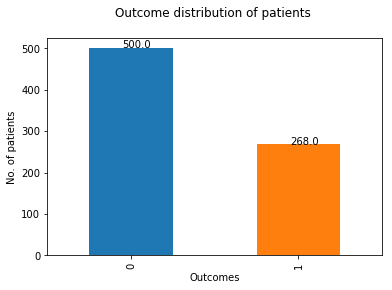

In [11]:
# Visualize number of different classes 
ax = plt.rc("font", size = 10)
ax = Diabetes['Outcome'].value_counts().plot(kind='bar')
ax.set_title("Outcome distribution of patients \n")
ax.set_xlabel('Outcomes')
ax.set_ylabel('No. of patients')
for p in ax.patches:
    ax.annotate(format(p.get_height()),(p.get_x()+0.2,p.get_height()+0.2))
plt.savefig('Plots/pstients_distribution.png', bbox_inches = 'tight')    
plt.show()

In [12]:
# so, we have 500 people with diabetes and 268 without diabetes (inbalanced dataset)
# Hence, Accuracy is not a useful metric for machine learning algorithms.
# Other metrics should be used --> ROC_AUC, recall, precision, F1-score, sensitivity, specificity...

In [13]:
print(Diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


## Data Cleaning 

In [14]:
Diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
# replacing 0 values to Nan values.
Diabetes_copy = Diabetes.copy(deep = True)

Diabetes[['Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI']] = Diabetes[['Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
print(Diabetes.isnull().sum())
Diabetes.describe()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
# np.nan values replaced by mean or median.
Diabetes['Glucose'].fillna(Diabetes['Glucose'].mean(), inplace = True)
Diabetes['BloodPressure'].fillna(Diabetes['BloodPressure'].mean(), inplace = True)

Diabetes['SkinThickness'].fillna(Diabetes['SkinThickness'].median(), inplace = True)
Diabetes['Insulin'].fillna(Diabetes['Insulin'].median(), inplace = True)
Diabetes['BMI'].fillna(Diabetes['BMI'].median(), inplace = True)

In [17]:
Diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
Diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
# DONE

## Visualizations

In [20]:
# For curve fittng 
from scipy import stats 
% matplotlib inline 

In [21]:
Diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

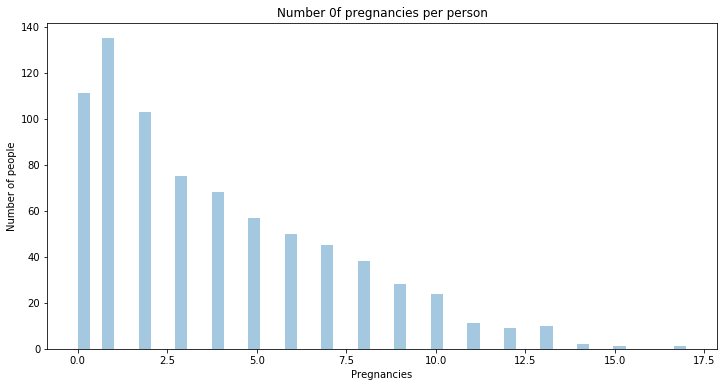

In [22]:
# 1. Pregnancies 
plt.figure(figsize = (12, 6))
sns.distplot(Diabetes['Pregnancies'], kde = False, bins = 50)
plt.xlabel("Pregnancies")
plt.ylabel("Number of people")
plt.title("Number 0f pregnancies per person")

plt.savefig("Plots/Number of pregnacncies per person.png")

In [23]:
Diabetes['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [24]:
# most frequent case is 1 children per pima women.

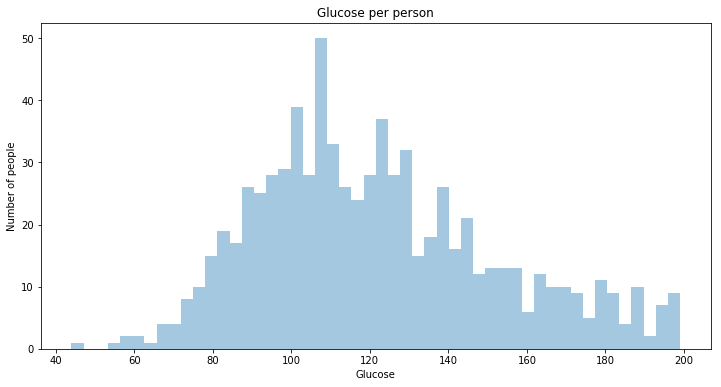

In [25]:
# Glucose 
plt.figure(figsize = (12, 6))
sns.distplot(Diabetes['Glucose'], kde = False, bins = 50)
plt.xlabel('Glucose')
plt.ylabel('Number of people')
plt.title("Glucose per person")

plt.savefig("Plots/Glucose per person.png")

In [26]:
#BloodPressure 

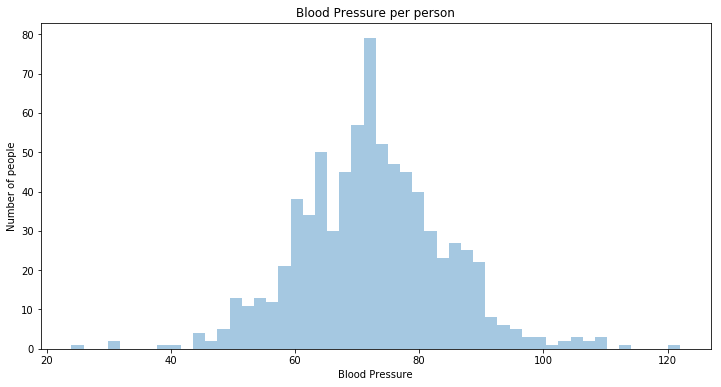

In [27]:
plt.figure(figsize = (12, 6))
sns.distplot(Diabetes['BloodPressure'], kde = False, bins = 50)
plt.xlabel("Blood Pressure")
plt.ylabel("Number of people")
plt.title("Blood Pressure per person")

plt.savefig('Plots/Blood Pressure per person.png')

In [28]:
# for glucose and blood pressure, data seems to be of normal distribution.

In [29]:
#SkinThickness

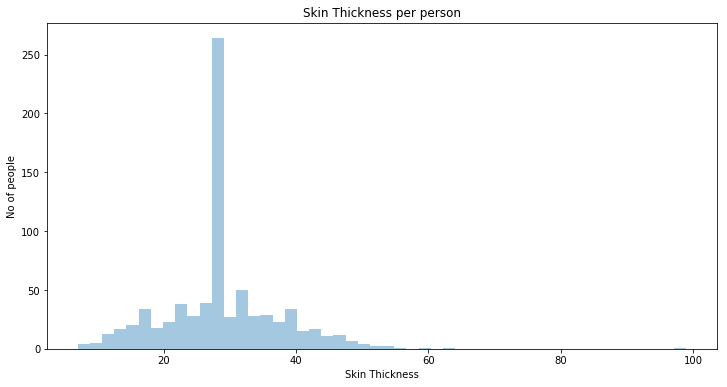

In [30]:
plt.figure(figsize = (12, 6))
sns.distplot(Diabetes['SkinThickness'], kde = False, bins = 50)
plt.xlabel('Skin Thickness')
plt.ylabel('No of people')
plt.title('Skin Thickness per person')

plt.savefig('Plots/Skin Thickness per person.png')

In [31]:
Diabetes.SkinThickness.describe()

count    768.000000
mean      29.108073
std        8.791221
min        7.000000
25%       25.000000
50%       29.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [32]:
# is normal , but contains 227 null values replaced by median

In [33]:
# Insulin

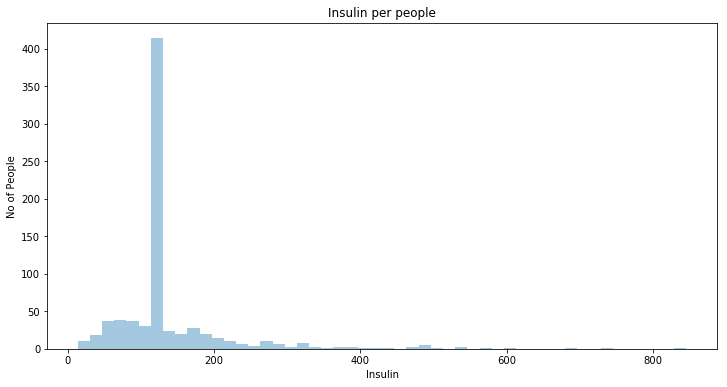

In [34]:
plt.figure(figsize = (12, 6))
sns.distplot(Diabetes['Insulin'], kde = False, bins = 50)
plt.xlabel('Insulin')
plt.ylabel('No of People')
plt.title('Insulin per people')
plt.savefig("Plots/Insulin per people.png")

In [35]:
#BMI

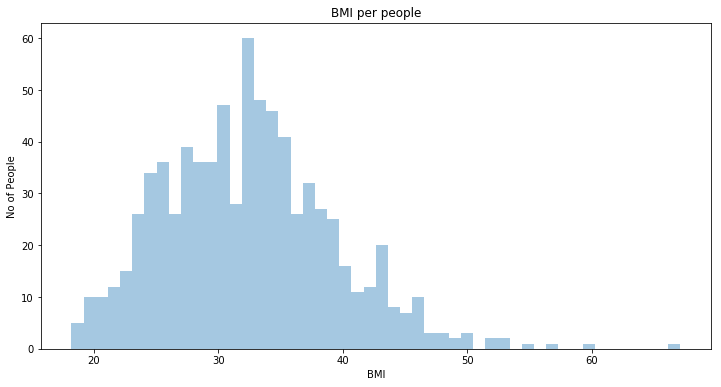

In [36]:
plt.figure(figsize = (12, 6))
sns.distplot(Diabetes['BMI'], kde = False, bins = 50)
plt.xlabel('BMI')
plt.ylabel('No of People')
plt.title("BMI per people")

plt.savefig('Plots/BMI per people.png')

In [37]:
Diabetes['BMI'].describe()

count    768.000000
mean      32.455208
std        6.875177
min       18.200000
25%       27.500000
50%       32.300000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [38]:
# seems Normal distribution

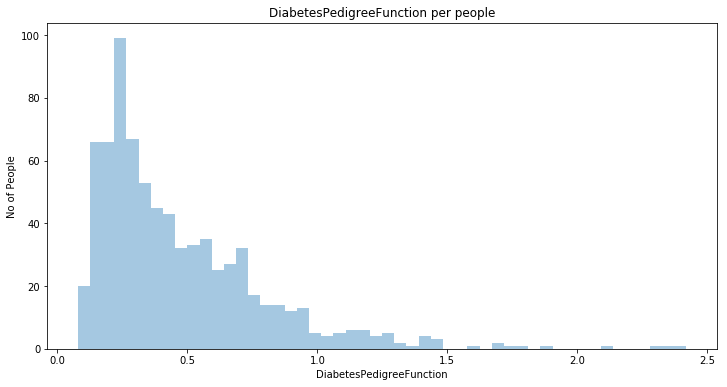

In [39]:
# DiabetesPedigreeFunction 
plt.figure(figsize = (12, 6))
sns.distplot(Diabetes['DiabetesPedigreeFunction'], kde = False, bins = 50)
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('No of People')
plt.title("DiabetesPedigreeFunction per people")

plt.savefig('Plots/DiabetesPedigreeFunction per people.png')

In [40]:
# need to convert to normal distribution 

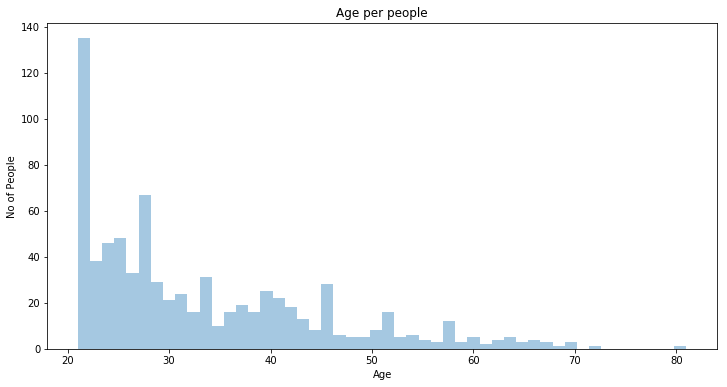

In [41]:
# Age 
plt.figure(figsize = (12, 6))
sns.distplot(Diabetes['Age'], kde = False, bins = 50)
plt.xlabel('Age')
plt.ylabel('No of People')
plt.title("Age per people")

plt.savefig('Plots/Age per people.png')

In [42]:
Diabetes.Age.describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

In [43]:
# might need to convert to normal distribution.

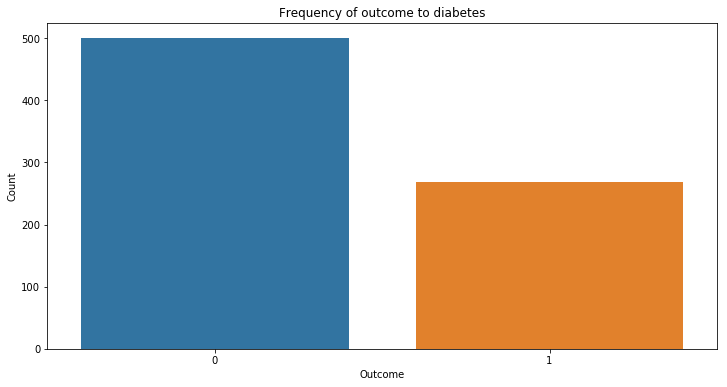

In [44]:
# Outcome
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Outcome', data = Diabetes)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Frequency of outcome to diabetes')

plt.savefig('Plots/Frequency of outcome to diabetes.png')
plt.show()

In [45]:
# Ratio of population with diabetes 
print("Ratio of people with diabetes :", str(len(Diabetes[Diabetes['Outcome'] == 1])/ len(Diabetes)))

Ratio of people with diabetes : 0.3489583333333333


In [46]:
# inbalanced Dataset

### Bivariate visualizations

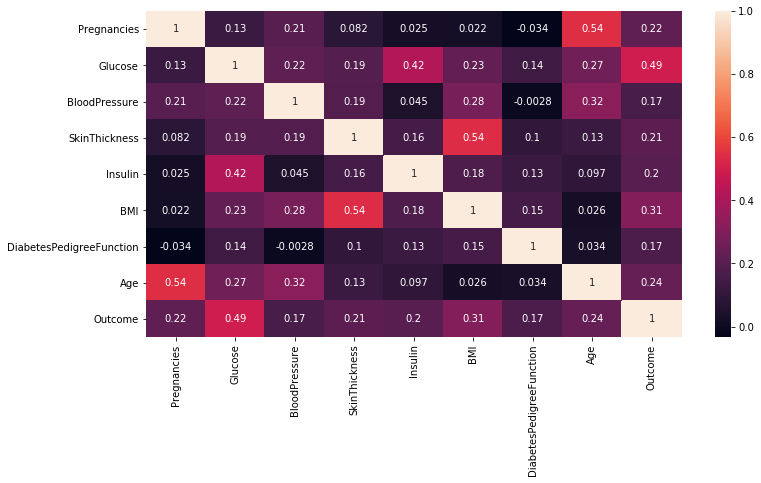

In [47]:
# Correlation between variables 
plt.figure(figsize = (12, 6))
Corr = Diabetes[Diabetes.columns].corr()
sns.heatmap(Corr, annot=True)
plt.savefig('Plots/correlation_between_variables.png', bbinches = 'tight')

* Not strong correlations between different features. (No need to drop features)
* Glucose has a strong correlation with Outcome.
* Some obvious correlations --> {Skinthickness : BMI}, {Age : Pregnancies}

### Whole Diabetes dataset

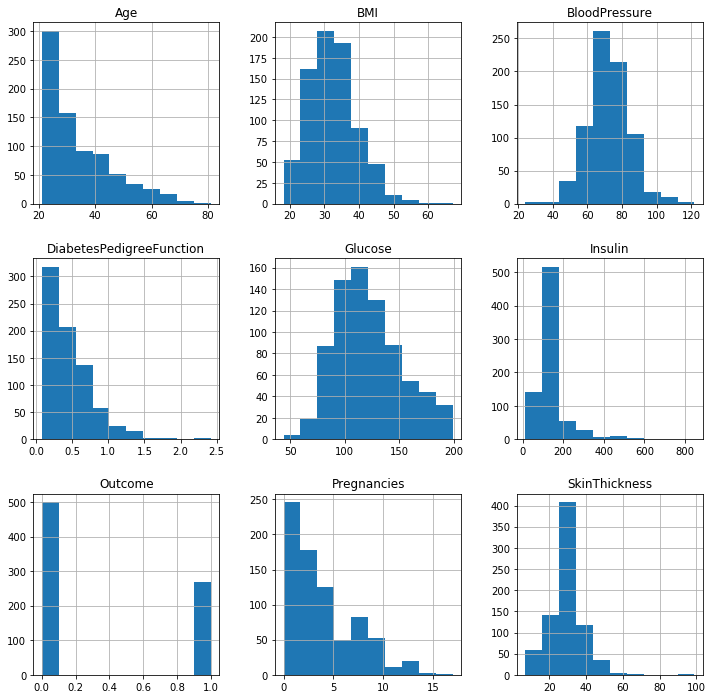

In [48]:
Diabetes.hist(figsize = (12, 12))
plt.savefig("Plots/Whole Diabetes data distribution.png")
plt.show()

### Glucose 

In [ ]:
g = sns.FacetGrid(Diabetes, col = 'Glucose', size = 5)
g = g.map(plt.hist, "Glucose", bins = 30)